In [1]:
!nvidia-smi

Sat May  4 00:50:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              45W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 8.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

PATH = "/content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection"
os.chdir(PATH)

from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 28.8/201.2 GB disk)


In [6]:
from ultralytics import YOLO

In [7]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00


In [8]:
from roboflow import Roboflow

rf = Roboflow(api_key="JKBhjxGlu9rXsc9oW6DT")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [9]:
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 source={PATH}/football-players-detection-1/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/13 /content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/football-players-detection-1/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 18 persons, 1 tv, 140.7ms
image 2/13 /content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/football-players-detection-1/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 384x640 19 persons, 10.4ms
image 3/13 /content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/football-players-detection-1/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 384x640 19 persons, 1 tv, 10.0ms
image 4/13 /content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/football-players-detection-1/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e

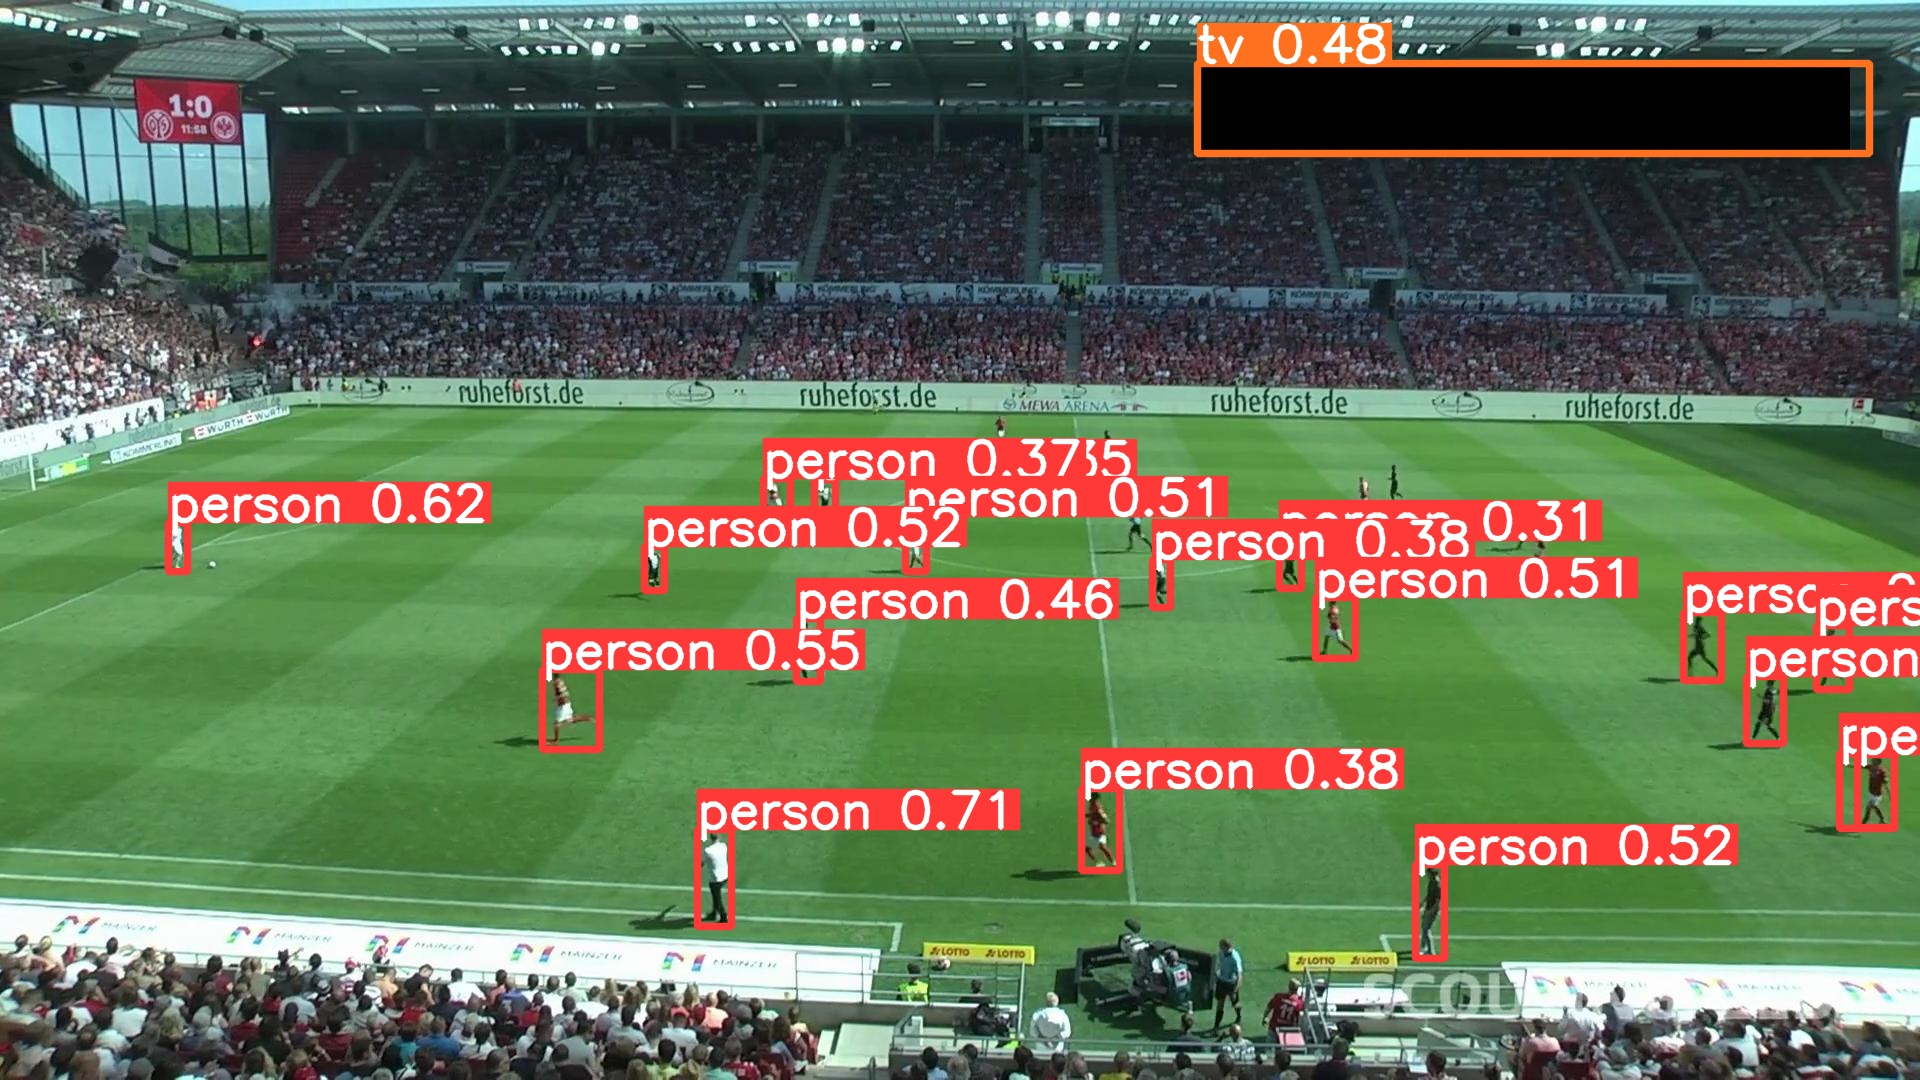

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{PATH}/runs/detect/predict/*.jpg')[:1]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [12]:
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 source={PATH}/input_videos/videoclip_2.mp4 save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

video 1/1 (1/750) /content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/input_videos/videoclip_2.mp4: 384x640 21 persons, 142.3ms
video 1/1 (2/750) /content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/input_videos/videoclip_2.mp4: 384x640 19 persons, 10.3ms
video 1/1 (3/750) /content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/input_videos/videoclip_2.mp4: 384x640 20 persons, 9.3ms
video 1/1 (4/750) /content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/input_videos/videoclip_2.mp4: 384x640 19 persons, 9.2ms
video 1/1 (5/750) /content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/input_videos/videoclip_2.mp4: 384x640 20 persons, 9.4ms
video 1/1 (6/750) /content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/input_videos/videoclip_2.mp4: 384x

In [17]:
from IPython.display import Video
processed_video_path = f"/content/drive/MyDrive/Football/YOLOv8_Football_Object_Detection/runs/detect/predict3/videoclip_2.avi"
Video(processed_video_path)

**Conclusion:** We can see that a annotated video file has been saved to the above mentioned path that can be watched.